In [1]:
import pandas as pd

Ver = []
Met = [[] for _ in range(3)]
time = {}
Time = [[] for _ in range(5)]

data = pd.read_csv('../../evaluation/Ver8_2_0.2_0.5/result.csv', header=None)
for i in [0]:
    Ver.insert(0, data[0][i])
    for j in range(3):
        Met[j].insert(0, data[j+1][i])

data = pd.read_csv('../../time/Ver8_2_0.2_0.5/time.csv', header=None)
for i in range(len(data[0])):
    time[data[0][i]] = [data[1][i], data[2][i], data[3][i], data[4][i], data[5][i]]

for i in [0]:
    j = Ver[i]
    for k in range(5):
        Time[k].insert(0, time[j][k])

data = pd.read_csv('../../evaluation/Ver7_2_0.2_0.5/result.csv', header=None)
for i in [0]:
    Ver.insert(0, data[0][i])
    for j in range(3):
        Met[j].insert(0, data[j+1][i])

data = pd.read_csv('../../time/Ver7_2_0.2_0.5/time.csv', header=None)
for i in range(len(data[0])):
    time[data[0][i]] = [data[1][i], data[2][i], data[3][i], data[4][i], data[5][i]]

for i in [0]:
    j = Ver[i]
    for k in range(5):
        Time[k].insert(0, time[j][k])

data = pd.read_csv('../../evaluation/Ver6_1_2-4_0.2-0.3_0.4-0.6/result.csv', header=None)
for i in [1]:
    Ver.insert(0, data[0][i])
    for j in range(3):
        Met[j].insert(0, data[j+1][i])

data = pd.read_csv('../../time/Ver6_1_2-4_0.2-0.3_0.4-0.6/time.csv', header=None)
for i in range(len(data[0])):
    time[data[0][i]] = [data[1][i], data[2][i], data[3][i], data[4][i], data[5][i]]

for i in [0]:
    j = Ver[i]
    for k in range(5):
        Time[k].insert(0, time[j][k])
        
data = pd.read_csv('../../evaluation/Ver5_2_0.2_0.5/result.csv', header=None)
for i in [0]:
    Ver.insert(0, data[0][i])
    for j in range(3):
        Met[j].insert(0, data[j+1][i])

data = pd.read_csv('../../time/Ver5_2_0.2_0.5/time.csv', header=None)
for i in range(len(data[0])):
    time[data[0][i]] = [data[1][i], data[2][i], data[3][i], data[4][i], data[5][i]]

for i in [0]:
    j = Ver[i]
    for k in range(5):
        Time[k].insert(0, time[j][k])
        
data = pd.read_csv('../../evaluation/Ver4_2_0.2_0.5/result.csv', header=None)
for i in [0]:
    Ver.insert(0, data[0][i])
    for j in range(3):
        Met[j].insert(0, data[j+1][i])

data = pd.read_csv('../../time/Ver4_2_0.2_0.5/time.csv', header=None)
for i in range(len(data[0])):
    time[data[0][i]] = [data[1][i], data[2][i], data[3][i], data[4][i], data[5][i]]

for i in [0]:
    j = Ver[i]
    for k in range(5):
        Time[k].insert(0, time[j][k])
        
data = pd.read_csv('../../evaluation/Ver3_1_2-4_0-0.2_0-1/result.csv', header=None)
for i in [9, 20, 1, 0]:
    Ver.insert(0, data[0][i])
    for j in range(3):
        Met[j].insert(0, data[j+1][i])

data = pd.read_csv('../../time/Ver3_1_2-4_0-0.2_0-1/time.csv', header=None)
for i in range(len(data[0])):
    time[data[0][i]] = [data[1][i], data[2][i], data[3][i], data[4][i], data[5][i]]

for i in range(3, -1, -1):
    j = Ver[i]
    for k in range(5):
        Time[k].insert(0, time[j][k])

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

def plot_result(Ver, Met, Time, ext, Name=''):
    N = len(ext)
    Met, Time = np.array(Met), np.array(Time)
    Ver, Met, Time = [Ver[i] for i in ext], Met[:,ext], Time[:,ext]
    idx = np.arange(N) * 4
    bar_width = 0.8
    Bot = [[0 for _ in range(N)] for _ in range(5)]
    for i in range(4):
        for j in range(N):
            if i == 0:
                Bot[i + 1][j] = Time[i][j]
            else:
                Bot[i + 1][j] = Bot[i][j] + Time[i][j]
    fig, ax1 = plt.subplots(figsize=(15, 10))
    plt.grid(True)
    fig.set_facecolor('white')
    b1 = plt.bar(idx, Met[0], bar_width, label='HMean', color='black', zorder=10)
    b2 = plt.bar(idx + bar_width, Met[1], bar_width, label='Precision', color='red', zorder=10)
    b3 = plt.bar(idx + 2*bar_width, Met[2], bar_width, label='Recall', color='blue', zorder=10)
    plt.xticks(idx + 3/2*bar_width, Ver, rotation=0)
    plt.ylabel('[%]')
    plt.ylim([97, 98])
    ax2 = ax1.twinx()
    b4 = ax2.bar(idx + 3*bar_width, Time[0], label='Data handling\n(Mask, GPU to CPU)', color='silver')
    b5 = ax2.bar(idx + 3*bar_width, Time[1], bottom=Bot[1], label='PA (Pixel Aggregation)', color='indigo')
    b6 = ax2.bar(idx + 3*bar_width, Time[2], bottom=Bot[2], label='Resizing', color='magenta')
    b7 = ax2.bar(idx + 3*bar_width, Time[3], bottom=Bot[3], label='Boxgen', color='olive')
    b8 = ax2.bar(idx + 3*bar_width, Time[4], bottom=Bot[4], label='Data handling (Output)', color='cyan')
    plt.ylim([0, 1500])
    plt.ylabel('Time [ms]')
    bs = [b1, b2, b3, b4, b5, b6, b7, b8]
    labels = [b.get_label() for b in bs]
    plt.legend(bs, labels, loc='upper right', bbox_to_anchor=(1.41, 1.02))
    if Name != '':
        plt.savefig(Name + '.png', dpi=300, bbox_inches='tight', pad_inches=0.3, transparent=False)

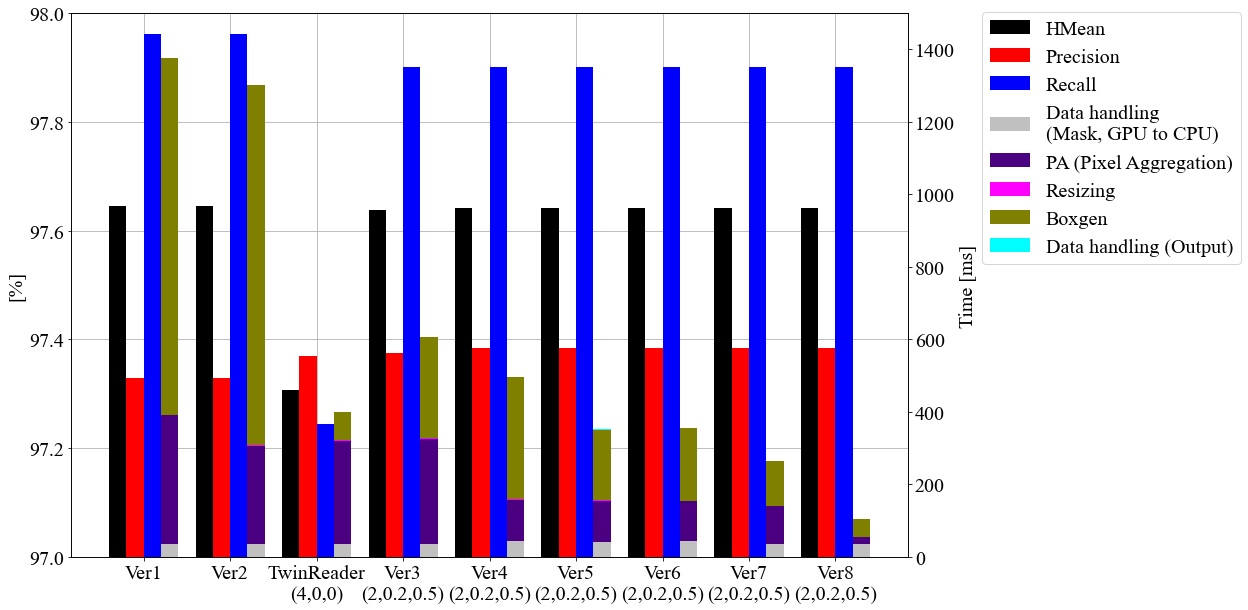

In [3]:
Ver[2] = 'TwinReader\n(4,0,0)'
Ver[3] = 'Ver3\n(2,0.2,0.5)'
Ver[4] = 'Ver4\n(2,0.2,0.5)'
Ver[5] = 'Ver5\n(2,0.2,0.5)'
Ver[6] = 'Ver6\n(2,0.2,0.5)'
Ver[7] = 'Ver7\n(2,0.2,0.5)'
Ver[8] = 'Ver8\n(2,0.2,0.5)'
plot_result(Ver, Met, Time, [0, 1, 2, 3, 4, 5, 6, 7, 8], 'Ver8_Base')

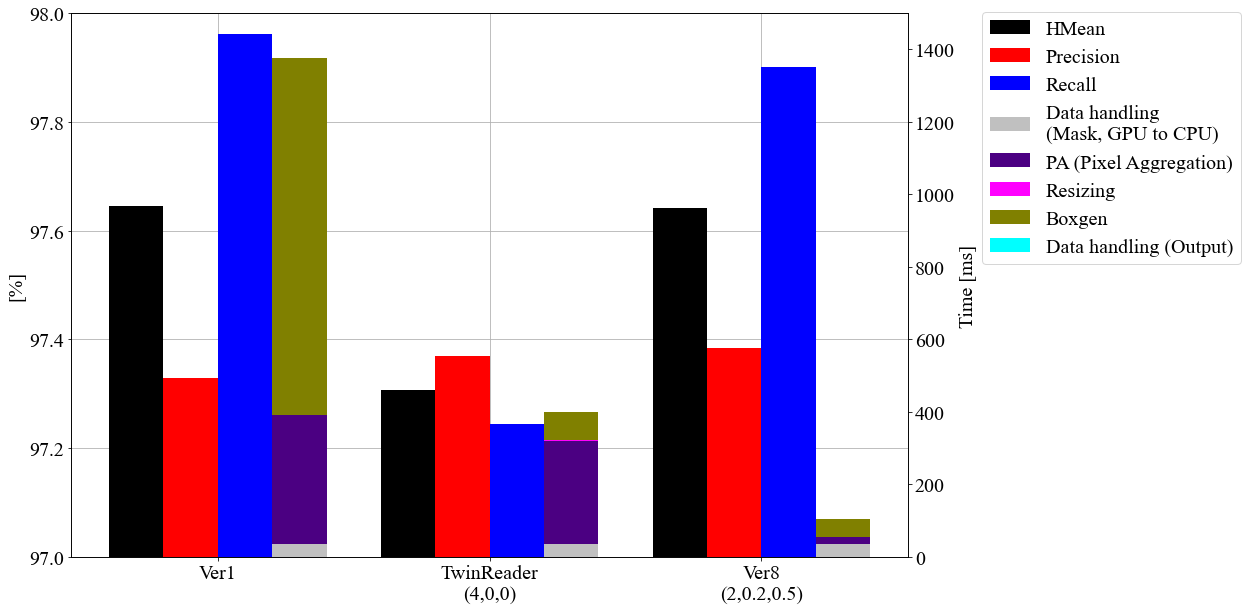

In [4]:
plot_result(Ver, Met, Time, [0, 2, 8], 'Result')

In [5]:
print('Ver1 vs Ver8 - HMean: ', Met[0][8] - Met[0][0])
print('Ver1 vs Ver8 - Precision: ', Met[1][8] - Met[1][0])
print('Ver1 vs Ver8 - Recall: ', Met[2][8] - Met[2][0])

print('Product vs Ver8 - HMean: ', Met[0][8] - Met[0][2])
print('Product vs Ver8 - Precision: ', Met[1][8] - Met[1][2])
print('Product vs Ver8 - Recall: ', Met[2][8] - Met[2][2])

Ver1 vs Ver8 - HMean:  -0.0021216334581026786
Ver1 vs Ver8 - Precision:  0.055243745472736805
Ver1 vs Ver8 - Recall:  -0.0601659751037289
Product vs Ver8 - HMean:  0.33601673745313576
Product vs Ver8 - Precision:  0.01564404840878808
Product vs Ver8 - Recall:  0.6576763485477244


In [6]:
a,b,c=0,0,0

for i in range(5):
    a += Time[i][0]
    b += Time[i][2]
    c += Time[i][8]
    
print('Ver1 vs Ver8 - [%]: ', (c - a) / a * 100)
print('Ver1 vs Ver8 - [ms]: ', c - a)

print('Product vs Ver8 - [%]: ', (c - b) / b * 100)
print('Product vs Ver8 - [ms]: ', c - b)

print(c)

Ver1 vs Ver8 - [%]:  -92.46977149924743
Ver1 vs Ver8 - [ms]:  -1273.791435921546
Product vs Ver8 - [%]:  -74.11985802692297
Product vs Ver8 - [ms]:  -297.0808236905844
103.73055344760989
